# Seasonal Analysis of IOWA Liquor Market

## Introducion of the Topic and load of dataset

 As Data analyst from the State of Iowa we will bring a better view of the relationship between the products by category and the seasonal period. In this project we will try to give a better explanation in plane language to the State of Iowa to further decision on marketing , sales campaing or stock prediction.
 
At the end of analyzis we will have a few conclusions driving the reader to understand the data , graphs and calculation presented.

In [8]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as display

# reading the CSV file
liquor_sales_data = pd.read_csv('dataset.csv')


## 1 Cleaning of the dataset

In [10]:
# in this line we will drop the columns that are not needed for that project
columns_to_drop = ['category','store_number','store_name','city','zip_code','county_number','county','Unnamed: 0','item_number', 'item_description', 'vendor_number', 'vendor_name', 'pack', 'state_bottle_cost', 'state_bottle_retail']
liquor_sales_data.drop(columns=columns_to_drop, inplace=True)

In [11]:
# now we would like to see what columns related to our project are left for further exploration
liquor_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12061225 entries, 0 to 12061224
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   category_name        object 
 2   bottle_volume_ml     int64  
 3   bottles_sold         int64  
 4   sale_dollars         float64
 5   volume_sold_liters   float64
 6   volume_sold_gallons  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 644.1+ MB


In [12]:
# Convert 'date' column to datetime format
liquor_sales_data['date'] = pd.to_datetime(liquor_sales_data['date'])

In [13]:
# Number of unique values for categorical columns
unique_counts = liquor_sales_data.nunique()
print('Number of unique values for categorical columns:',unique_counts)

Number of unique values for categorical columns: date                    1337
category_name             61
bottle_volume_ml          40
bottles_sold             607
sale_dollars           20050
volume_sold_liters      1323
volume_sold_gallons     1475
dtype: int64


In [14]:
# Check for missing values
missing_values = liquor_sales_data.isnull().sum()

print('Missing values:',missing_values)

Missing values: date                      0
category_name          5621
bottle_volume_ml          0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64


In [15]:
# Drop missing values
liquor_sales_data.dropna(inplace=True)

# Verify that missing values have been dropped
missing_values_after_drop = liquor_sales_data.isnull().sum()
print('Missing values after dropping:', missing_values_after_drop)

Missing values after dropping: date                   0
category_name          0
bottle_volume_ml       0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
dtype: int64


In [16]:
# Number of unique values for categorical columns after remove the missing values
unique_counts = liquor_sales_data.nunique()
print('Number of unique values for categorical columns:',unique_counts)

Number of unique values for categorical columns: date                    1337
category_name             61
bottle_volume_ml          40
bottles_sold             607
sale_dollars           20003
volume_sold_liters      1322
volume_sold_gallons     1474
dtype: int64


# #2 Exploration of the dataset

First of all we need to separate the quantitative and categorical variable.

In [17]:
# Selecting quantitative variables
quantitative_vars = liquor_sales_data.select_dtypes(include=['float64', 'int64'])

# Selecting categorical variables
categorical_vars = liquor_sales_data.select_dtypes(include=['object'])

print("Quantitative variables:")
print(quantitative_vars.columns.tolist())

print("\nCategorical variables:")
print(categorical_vars.columns.tolist())

Quantitative variables:
['bottle_volume_ml', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons']

Categorical variables:
['category_name']


Below there is a example of the dataset after the cleaning.


In [18]:

liquor_sales_data.head(10)

,date,category_name,bottle_volume_ml,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2020-11-19,AMERICAN VODKAS,1750,54,581.04,94.5,24.96
1,2019-06-04,AMERICAN VODKAS,1750,108,3078.00,189.0,49.92
2,2018-04-03,WHITE RUM,1000,2,28.50,2.0,0.53
3,2018-04-24,SPICED RUM,500,4,28.80,2.0,0.53
4,2018-07-09,AMERICAN SCHNAPPS,1000,2,23.62,2.0,0.53
5,2018-05-29,WHISKEY LIQUEUR,1000,2,38.92,2.0,0.53
6,2018-06-11,IMPORTED DRY GINS,1000,6,130.44,6.0,1.59
7,2018-07-12,IMPORTED VODKAS,500,12,97.20,6.0,1.59
8,2019-11-26,AMERICAN VODKAS,1750,4,43.20,7.0,1.84
9,2021-09-07,AMERICAN VODKAS,1750,4,43.32,7.0,1.84


Below there are some info related to the data set

In [19]:
# shape
print("The dataset shape is :", liquor_sales_data.shape)
print("The dataset frame is :", "\n",  liquor_sales_data.head(n=30))  
        
# sample rows
num_rows = len(liquor_sales_data)
print("Number of rows:", num_rows)

# columns
num_columns = liquor_sales_data.shape[1]
print("Number of columns:", num_columns)

The dataset shape is : (12055604, 7)
The dataset frame is : 
          date                   category_name  bottle_volume_ml  bottles_sold  \
0  2020-11-19                 AMERICAN VODKAS              1750            54   
1  2019-06-04                 AMERICAN VODKAS              1750           108   
2  2018-04-03                       WHITE RUM              1000             2   
3  2018-04-24                      SPICED RUM               500             4   
4  2018-07-09               AMERICAN SCHNAPPS              1000             2   
5  2018-05-29                 WHISKEY LIQUEUR              1000             2   
6  2018-06-11               IMPORTED DRY GINS              1000             6   
7  2018-07-12                 IMPORTED VODKAS               500            12   
8  2019-11-26                 AMERICAN VODKAS              1750             4   
9  2021-09-07                 AMERICAN VODKAS              1750             4   
10 2019-09-13                  COCKTAILS /RTD  

### 2.1 Examination of the category_name variable

For better visualization we will select the  top5 products for pie and graphs below

The describe of variable category_namer: 
count            12055604
unique                 61
top       AMERICAN VODKAS
freq              1815566
Name: category_name, dtype: object

The number of values in the category_name variable:
category_name
AMERICAN VODKAS                    1815566
CANADIAN WHISKIES                  1148173
STRAIGHT BOURBON WHISKIES           822536
WHISKEY LIQUEUR                     636848
AMERICAN FLAVORED VODKA             580564
                                    ...   
TEMPORARY  & SPECIALTY PACKAGES         35
IMPORTED GINS                           17
IMPORTED WHISKIES                       12
AMERICAN WHISKIES                        1
DELISTED / SPECIAL ORDER ITEMS           1
Name: count, Length: 61, dtype: int64



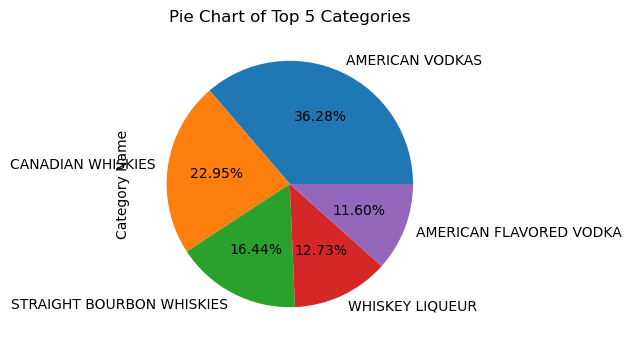

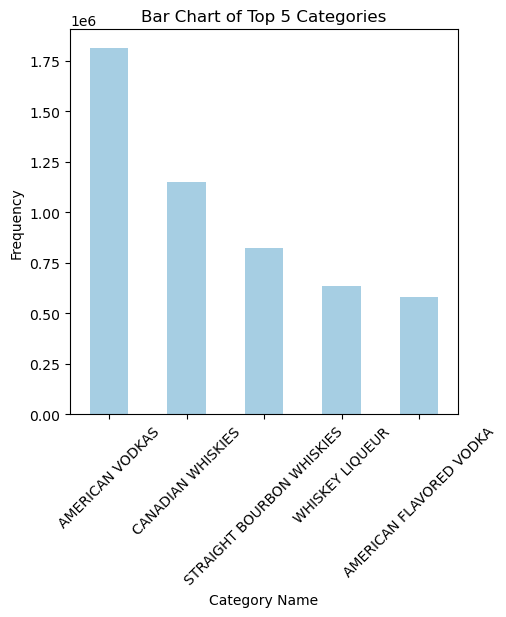

In [23]:
# Describe the 'category_name' variabe
print('The describe of variable category_namer: ')
print(liquor_sales_data['category_name'].describe())
print()

# Count the number of values in the 'category_name' variable
print('The number of values in the category_name variable:')
print(liquor_sales_data['category_name'].value_counts())
print()

# Identify the top 5 categories
top_categories = liquor_sales_data['category_name'].value_counts().nlargest(5).index.tolist()

# Filter the dataset to include only the top 5 categories
top_categories_data = liquor_sales_data[liquor_sales_data['category_name'].isin(top_categories)]

# Create a pie chart for the top 5 categories
plt.figure(figsize=(5, 4))
top_categories_data['category_name'].value_counts().plot(kind='pie', autopct='%.2f%%', ylabel='Category Name')
plt.title('Pie Chart of Top 5 Categories')
plt.show()

# Create a bar chart for the top 5 categories
plt.figure(figsize=(5, 5))
top_categories_data['category_name'].value_counts().plot(kind='bar', rot=45, colormap='Paired')
plt.title('Bar Chart of Top 5 Categories')
plt.xlabel('Category Name')
plt.ylabel('Frequency')
plt.show()

### 2.2 Examination of the bottle_volume_ml  variable

The describe of bottle_volume_ml variable: 
count    1.205560e+07
mean     8.517562e+02
std      5.245852e+02
min      2.000000e+01
25%      6.000000e+02
50%      7.500000e+02
75%      1.000000e+03
max      6.000000e+03
Name: bottle_volume_ml, dtype: float64


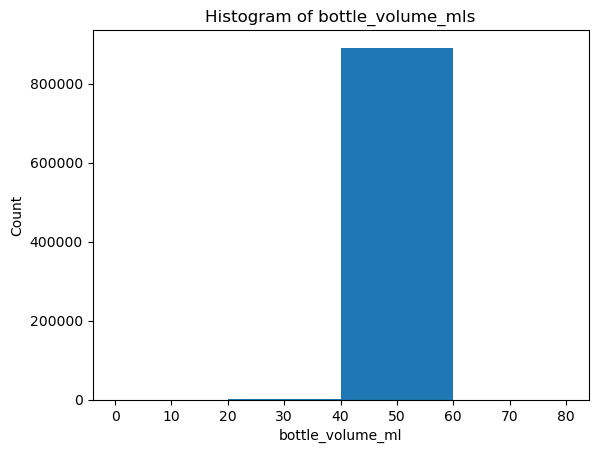

The mode of variable bottle_volume_ml:
0    750
Name: bottle_volume_ml, dtype: int64
The mean of variable bottle_volume_ml:
851.7561689982517
The median of variable bottle_volume_ml:
750.0
The min  of variable bottle_volume_ml:
20
The max  of variable bottle_volume_ml:
6000
The range  of variable bottle_volume_ml:
5980
The Q25 fo the variable bottle_volume_ml:
600.0
The Q75 fo the variable bottle_volume_ml:
600.0
The IQR of the variable bottle_volume_ml:
400.0
The outliers: 0           1750
1           1750
8           1750
9           1750
10          1750
            ... 
11237495    3000
11245738    3000
11256886    3000
11256887    3000
11265915    3000
Name: bottle_volume_ml, Length: 2360603, dtype: int64
The standard deviation of bottle_volume_ml: 524.5851540309353


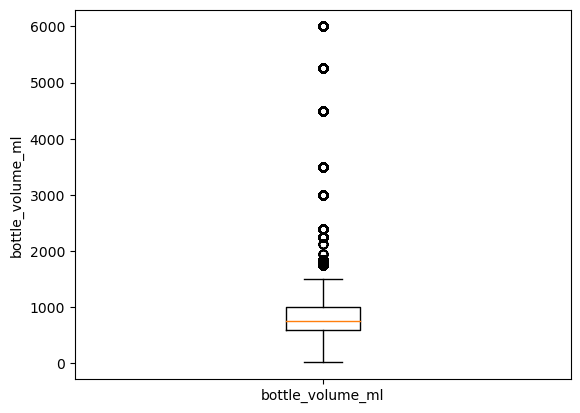

In [25]:
# Describe the bottle_volume_ml variable
print('The describe of bottle_volume_ml variable: ')
print(liquor_sales_data['bottle_volume_ml'].describe())

#Plot the histogram with the specific bins
bottle_volume_mls = liquor_sales_data['bottle_volume_ml']
bins = [0,20,40,60,80]
plt.hist(x=bottle_volume_mls, bins=bins, histtype='bar')
plt.xlabel('bottle_volume_ml')
plt.ylabel('Count')
plt.title('Histogram of bottle_volume_mls')
plt.show()


#calculate mode, mean, median for a quantitative variable (‘bottle_volume_ml’) from data frame

print('The mode of variable bottle_volume_ml:')
print(liquor_sales_data['bottle_volume_ml'].mode())


print('The mean of variable bottle_volume_ml:')
print(liquor_sales_data['bottle_volume_ml'].mean())


print('The median of variable bottle_volume_ml:')
print(liquor_sales_data['bottle_volume_ml'].median())

print('The min  of variable bottle_volume_ml:')
min_ = liquor_sales_data['bottle_volume_ml'].min()
print(min_ )

print('The max  of variable bottle_volume_ml:')
max_ = liquor_sales_data['bottle_volume_ml'].max()
print(max_)

print('The range  of variable bottle_volume_ml:')
range_ = max_ - min_
print(range_)

#Calculate quantiles, IQR, outliers for a quantitative variable (‘bottle_volume_ml’) from data frame

#The Q25 of the variable bottle_volume_ml
print('The Q25 fo the variable bottle_volume_ml:')
Q25 = liquor_sales_data['bottle_volume_ml'].quantile(0.25)
print(Q25)

#The Q75 of the variable bottle_volume_ml
print('The Q75 fo the variable bottle_volume_ml:')
Q75 = liquor_sales_data['bottle_volume_ml'].quantile(0.75)
print(Q25)

#The IQR of the variable bottle_volume_ml
print('The IQR of the variable bottle_volume_ml:')
IQR = Q75 - Q25
print(IQR)

#Idenfitying the outliers
bottle_volume_ml_outliers = liquor_sales_data[(liquor_sales_data['bottle_volume_ml'] < (Q25 - 1.5 * IQR)) | (liquor_sales_data['bottle_volume_ml'] > (Q75 + 1.5 * IQR))]['bottle_volume_ml']
print('The outliers:',bottle_volume_ml_outliers)

#calculate standard deviation of a quantitative variable (‘bottle_volume_ml’) from data frame
bottle_volume_ml_std = liquor_sales_data['bottle_volume_ml'].std()
print('The standard deviation of bottle_volume_ml:',bottle_volume_ml_std)

#box plot for a quantitative variable (‘bottle_volume_ml’) from data frame
plt.boxplot(x=liquor_sales_data['bottle_volume_ml'], labels=['bottle_volume_ml'])
plt.ylabel('bottle_volume_ml')
plt.show()



### 2.3 Examination of the bottles_sold  variable

The describe of bottles_sold variable: 
count    1.205560e+07
mean     1.146484e+01
std      3.326479e+01
min     -2.400000e+02
25%      3.000000e+00
50%      6.000000e+00
75%      1.200000e+01
max      1.320000e+04
Name: bottles_sold, dtype: float64


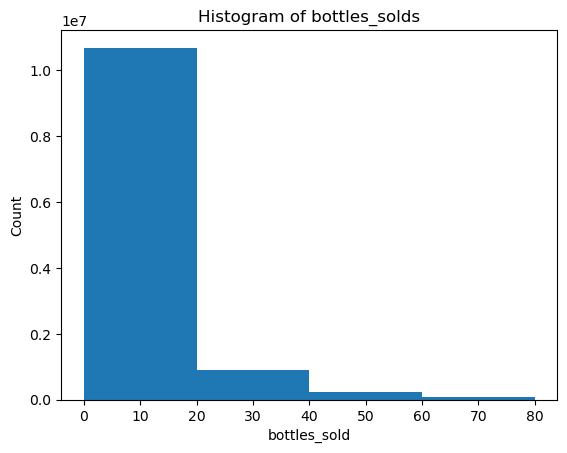

The mode of variable bottles_sold:
0    12
Name: bottles_sold, dtype: int64
The mean of variable bottles_sold:
11.464839671243348
The median of variable bottles_sold:
6.0
The min  of variable bottles_sold:
-240
The max  of variable bottles_sold:
13200
The range  of variable bottles_sold:
13440
The Q25 fo the variable bottles_sold:
3.0
The Q75 fo the variable bottles_sold:
3.0
The IQR of the variable bottles_sold:
9.0
The outliers: 0            54
1           108
16           36
24           36
34           36
           ... 
12031477     30
12031933     30
12033490     30
12033732     30
12033957     30
Name: bottles_sold, Length: 621124, dtype: int64
The standard deviation of bottles_sold: 33.264793633884935


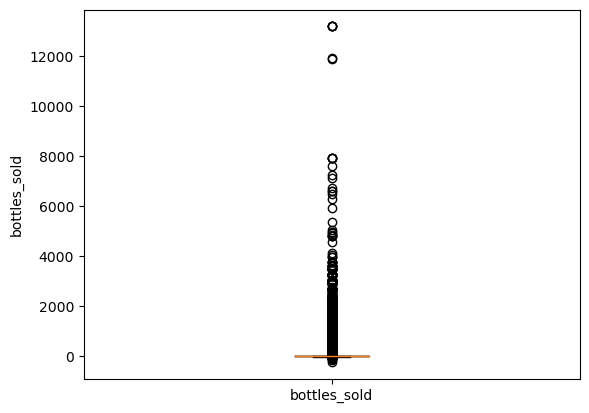

In [26]:
# Describe the bottles_sold variable
print('The describe of bottles_sold variable: ')
print(liquor_sales_data['bottles_sold'].describe())

#Plot the histogram with the specific bins
bottles_solds = liquor_sales_data['bottles_sold']
bins = [0,20,40,60,80]
plt.hist(x=bottles_solds, bins=bins, histtype='bar')
plt.xlabel('bottles_sold')
plt.ylabel('Count')
plt.title('Histogram of bottles_solds')
plt.show()


#calculate mode, mean, median for a quantitative variable (‘bottles_sold’) from data frame

print('The mode of variable bottles_sold:')
print(liquor_sales_data['bottles_sold'].mode())


print('The mean of variable bottles_sold:')
print(liquor_sales_data['bottles_sold'].mean())


print('The median of variable bottles_sold:')
print(liquor_sales_data['bottles_sold'].median())

print('The min  of variable bottles_sold:')
min_ = liquor_sales_data['bottles_sold'].min()
print(min_ )

print('The max  of variable bottles_sold:')
max_ = liquor_sales_data['bottles_sold'].max()
print(max_)

print('The range  of variable bottles_sold:')
range_ = max_ - min_
print(range_)

#Calculate quantiles, IQR, outliers for a quantitative variable (‘bottles_sold’) from data frame

#The Q25 of the variable bottles_sold
print('The Q25 fo the variable bottles_sold:')
Q25 = liquor_sales_data['bottles_sold'].quantile(0.25)
print(Q25)

#The Q75 of the variable bottles_sold
print('The Q75 fo the variable bottles_sold:')
Q75 = liquor_sales_data['bottles_sold'].quantile(0.75)
print(Q25)

#The IQR of the variable bottles_sold
print('The IQR of the variable bottles_sold:')
IQR = Q75 - Q25
print(IQR)

#Idenfitying the outliers
bottles_sold_outliers = liquor_sales_data[(liquor_sales_data['bottles_sold'] < (Q25 - 1.5 * IQR)) | (liquor_sales_data['bottles_sold'] > (Q75 + 1.5 * IQR))]['bottles_sold']
print('The outliers:',bottles_sold_outliers)

#calculate standard deviation of a quantitative variable (‘bottles_sold’) from data frame
bottles_sold_std = liquor_sales_data['bottles_sold'].std()
print('The standard deviation of bottles_sold:',bottles_sold_std)

#box plot for a quantitative variable (‘bottles_sold’) from data frame
plt.boxplot(x=liquor_sales_data['bottles_sold'], labels=['bottles_sold'])
plt.ylabel('bottles_sold')
plt.show()


### 2.4 Examination of the sale_dollars  variable

The describe of sale_dollars variable: 
count    1.205560e+07
mean     1.538985e+02
std      5.415314e+02
min     -3.375000e+03
25%      3.753000e+01
50%      8.100000e+01
75%      1.612800e+02
max      2.795573e+05
Name: sale_dollars, dtype: float64


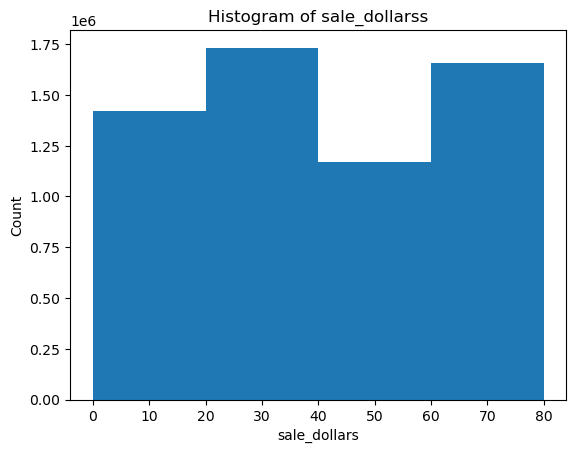

The mode of variable sale_dollars:
0    90.0
Name: sale_dollars, dtype: float64
The mean of variable sale_dollars:
153.89851915507512
The median of variable sale_dollars:
81.0
The min  of variable sale_dollars:
-3375.0
The max  of variable sale_dollars:
279557.28
The range  of variable sale_dollars:
282932.28
The Q25 fo the variable sale_dollars:
37.53
The Q75 fo the variable sale_dollars:
37.53
The IQR of the variable sale_dollars:
123.75
The outliers: 0            581.04
1           3078.00
13           499.50
16           579.96
24           620.64
             ...   
12024730     390.00
12028842     473.56
12031226     459.82
12031399     385.50
12033189     525.82
Name: sale_dollars, Length: 693597, dtype: float64
The standard deviation of sale_dollars: 541.5314240577575


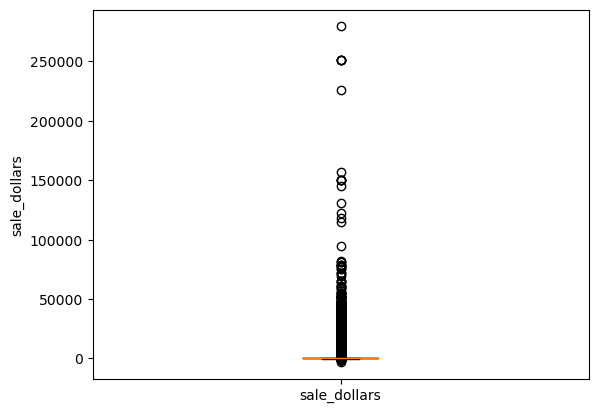

In [27]:
# Describe the sale_dollars variable
print('The describe of sale_dollars variable: ')
print(liquor_sales_data['sale_dollars'].describe())

#Plot the histogram with the specific bins
sale_dollarss = liquor_sales_data['sale_dollars']
bins = [0,20,40,60,80]
plt.hist(x=sale_dollarss, bins=bins, histtype='bar')
plt.xlabel('sale_dollars')
plt.ylabel('Count')
plt.title('Histogram of sale_dollarss')
plt.show()


#calculate mode, mean, median for a quantitative variable (‘sale_dollars’) from data frame

print('The mode of variable sale_dollars:')
print(liquor_sales_data['sale_dollars'].mode())


print('The mean of variable sale_dollars:')
print(liquor_sales_data['sale_dollars'].mean())


print('The median of variable sale_dollars:')
print(liquor_sales_data['sale_dollars'].median())

print('The min  of variable sale_dollars:')
min_ = liquor_sales_data['sale_dollars'].min()
print(min_ )

print('The max  of variable sale_dollars:')
max_ = liquor_sales_data['sale_dollars'].max()
print(max_)

print('The range  of variable sale_dollars:')
range_ = max_ - min_
print(range_)

#Calculate quantiles, IQR, outliers for a quantitative variable (‘sale_dollars’) from data frame

#The Q25 of the variable sale_dollars
print('The Q25 fo the variable sale_dollars:')
Q25 = liquor_sales_data['sale_dollars'].quantile(0.25)
print(Q25)

#The Q75 of the variable sale_dollars
print('The Q75 fo the variable sale_dollars:')
Q75 = liquor_sales_data['sale_dollars'].quantile(0.75)
print(Q25)

#The IQR of the variable sale_dollars
print('The IQR of the variable sale_dollars:')
IQR = Q75 - Q25
print(IQR)

#Idenfitying the outliers
sale_dollars_outliers = liquor_sales_data[(liquor_sales_data['sale_dollars'] < (Q25 - 1.5 * IQR)) | (liquor_sales_data['sale_dollars'] > (Q75 + 1.5 * IQR))]['sale_dollars']
print('The outliers:',sale_dollars_outliers)

#calculate standard deviation of a quantitative variable (‘sale_dollars’) from data frame
sale_dollars_std = liquor_sales_data['sale_dollars'].std()
print('The standard deviation of sale_dollars:',sale_dollars_std)

#box plot for a quantitative variable (‘sale_dollars’) from data frame
plt.boxplot(x=liquor_sales_data['sale_dollars'], labels=['sale_dollars'])
plt.ylabel('sale_dollars')
plt.show()


### 2.5 Examination of the volume_sold_liters  variable

The describe of volume_sold_liters variable: 
count    1.205560e+07
mean     9.328725e+00
std      3.941036e+01
min     -1.560000e+02
25%      1.500000e+00
50%      4.800000e+00
75%      1.050000e+01
max      1.320000e+04
Name: volume_sold_liters, dtype: float64


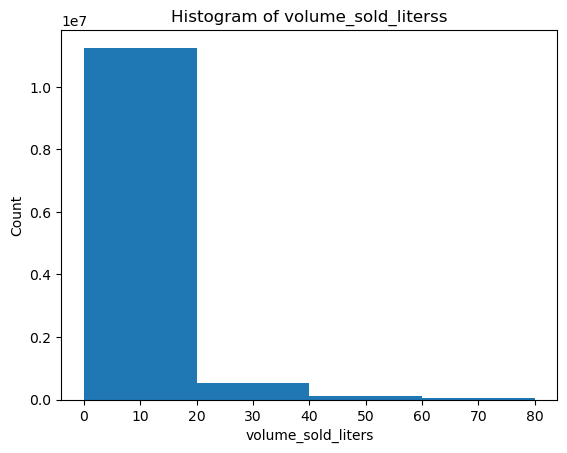

The mode of variable volume_sold_liters:
0    9.0
Name: volume_sold_liters, dtype: float64
The mean of variable volume_sold_liters:
9.32872473747479
The median of variable volume_sold_liters:
4.8
The min  of variable volume_sold_liters:
-156.0
The max  of variable volume_sold_liters:
13200.0
The range  of variable volume_sold_liters:
13356.0
The Q25 fo the variable volume_sold_liters:
1.5
The Q75 fo the variable volume_sold_liters:
1.5
The IQR of the variable volume_sold_liters:
9.0
The outliers: 0            94.5
1           189.0
34           27.0
35           27.0
36           27.0
            ...  
10841841     31.5
10841842     31.5
10841843     31.5
10841844     31.5
10841845     31.5
Name: volume_sold_liters, Length: 444726, dtype: float64
The standard deviation of volume_sold_liters: 39.41035539222034


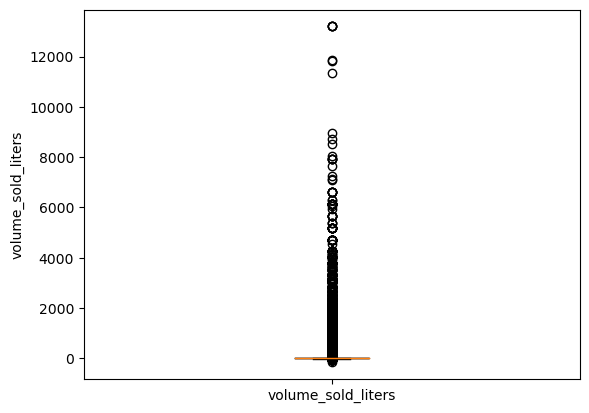

In [28]:
# Describe the volume_sold_liters variable
print('The describe of volume_sold_liters variable: ')
print(liquor_sales_data['volume_sold_liters'].describe())

#Plot the histogram with the specific bins
volume_sold_literss = liquor_sales_data['volume_sold_liters']
bins = [0,20,40,60,80]
plt.hist(x=volume_sold_literss, bins=bins, histtype='bar')
plt.xlabel('volume_sold_liters')
plt.ylabel('Count')
plt.title('Histogram of volume_sold_literss')
plt.show()


#calculate mode, mean, median for a quantitative variable (‘volume_sold_liters’) from data frame

print('The mode of variable volume_sold_liters:')
print(liquor_sales_data['volume_sold_liters'].mode())


print('The mean of variable volume_sold_liters:')
print(liquor_sales_data['volume_sold_liters'].mean())


print('The median of variable volume_sold_liters:')
print(liquor_sales_data['volume_sold_liters'].median())

print('The min  of variable volume_sold_liters:')
min_ = liquor_sales_data['volume_sold_liters'].min()
print(min_ )

print('The max  of variable volume_sold_liters:')
max_ = liquor_sales_data['volume_sold_liters'].max()
print(max_)

print('The range  of variable volume_sold_liters:')
range_ = max_ - min_
print(range_)

#Calculate quantiles, IQR, outliers for a quantitative variable (‘volume_sold_liters’) from data frame

#The Q25 of the variable volume_sold_liters
print('The Q25 fo the variable volume_sold_liters:')
Q25 = liquor_sales_data['volume_sold_liters'].quantile(0.25)
print(Q25)

#The Q75 of the variable volume_sold_liters
print('The Q75 fo the variable volume_sold_liters:')
Q75 = liquor_sales_data['volume_sold_liters'].quantile(0.75)
print(Q25)

#The IQR of the variable volume_sold_liters
print('The IQR of the variable volume_sold_liters:')
IQR = Q75 - Q25
print(IQR)

#Idenfitying the outliers
volume_sold_liters_outliers = liquor_sales_data[(liquor_sales_data['volume_sold_liters'] < (Q25 - 1.5 * IQR)) | (liquor_sales_data['volume_sold_liters'] > (Q75 + 1.5 * IQR))]['volume_sold_liters']
print('The outliers:',volume_sold_liters_outliers)

#calculate standard deviation of a quantitative variable (‘volume_sold_liters’) from data frame
volume_sold_liters_std = liquor_sales_data['volume_sold_liters'].std()
print('The standard deviation of volume_sold_liters:',volume_sold_liters_std)

#box plot for a quantitative variable (‘volume_sold_liters’) from data frame
plt.boxplot(x=liquor_sales_data['volume_sold_liters'], labels=['volume_sold_liters'])
plt.ylabel('volume_sold_liters')
plt.show()


### 2.6 Examination of the volume_sold_gallons  variable

The describe of volume_sold_gallons variable: 
count    1.205560e+07
mean     2.459483e+00
std      1.041129e+01
min     -4.121000e+01
25%      3.900000e-01
50%      1.260000e+00
75%      2.770000e+00
max      3.487070e+03
Name: volume_sold_gallons, dtype: float64


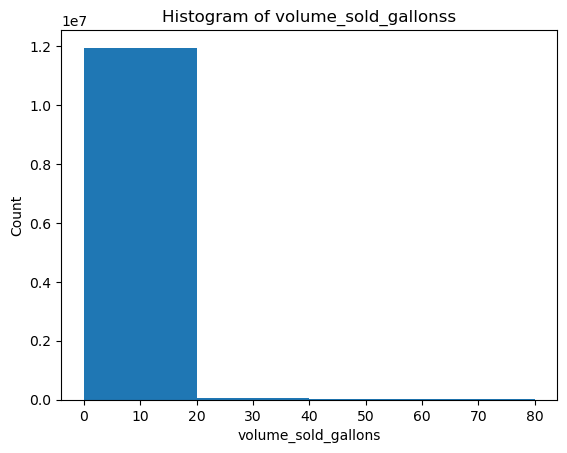

The mode of variable volume_sold_gallons:
0    2.37
Name: volume_sold_gallons, dtype: float64
The mean of variable volume_sold_gallons:
2.459482802354826
The median of variable volume_sold_gallons:
1.26
The min  of variable volume_sold_gallons:
-41.21
The max  of variable volume_sold_gallons:
3487.07
The range  of variable volume_sold_gallons:
3528.28
The Q25 fo the variable volume_sold_gallons:
0.39
The Q75 fo the variable volume_sold_gallons:
0.39
The IQR of the variable volume_sold_gallons:
2.38
The outliers: 0           24.96
1           49.92
34           7.13
35           7.13
36           7.13
            ...  
10841841     8.32
10841842     8.32
10841843     8.32
10841844     8.32
10841845     8.32
Name: volume_sold_gallons, Length: 444726, dtype: float64
The standard deviation of volume_sold_gallons: 10.411293815021486


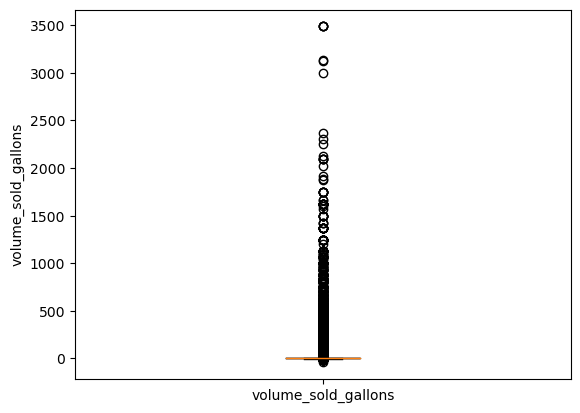

In [29]:
# Describe the volume_sold_gallons variable
print('The describe of volume_sold_gallons variable: ')
print(liquor_sales_data['volume_sold_gallons'].describe())

#Plot the histogram with the specific bins
volume_sold_gallonss = liquor_sales_data['volume_sold_gallons']
bins = [0,20,40,60,80]
plt.hist(x=volume_sold_gallonss, bins=bins, histtype='bar')
plt.xlabel('volume_sold_gallons')
plt.ylabel('Count')
plt.title('Histogram of volume_sold_gallonss')
plt.show()


#calculate mode, mean, median for a quantitative variable (‘volume_sold_gallons’) from data frame

print('The mode of variable volume_sold_gallons:')
print(liquor_sales_data['volume_sold_gallons'].mode())


print('The mean of variable volume_sold_gallons:')
print(liquor_sales_data['volume_sold_gallons'].mean())


print('The median of variable volume_sold_gallons:')
print(liquor_sales_data['volume_sold_gallons'].median())

print('The min  of variable volume_sold_gallons:')
min_ = liquor_sales_data['volume_sold_gallons'].min()
print(min_ )

print('The max  of variable volume_sold_gallons:')
max_ = liquor_sales_data['volume_sold_gallons'].max()
print(max_)

print('The range  of variable volume_sold_gallons:')
range_ = max_ - min_
print(range_)

#Calculate quantiles, IQR, outliers for a quantitative variable (‘volume_sold_gallons’) from data frame

#The Q25 of the variable volume_sold_gallons
print('The Q25 fo the variable volume_sold_gallons:')
Q25 = liquor_sales_data['volume_sold_gallons'].quantile(0.25)
print(Q25)

#The Q75 of the variable volume_sold_gallons
print('The Q75 fo the variable volume_sold_gallons:')
Q75 = liquor_sales_data['volume_sold_gallons'].quantile(0.75)
print(Q25)

#The IQR of the variable volume_sold_gallons
print('The IQR of the variable volume_sold_gallons:')
IQR = Q75 - Q25
print(IQR)

#Idenfitying the outliers
volume_sold_gallons_outliers = liquor_sales_data[(liquor_sales_data['volume_sold_gallons'] < (Q25 - 1.5 * IQR)) | (liquor_sales_data['volume_sold_gallons'] > (Q75 + 1.5 * IQR))]['volume_sold_gallons']
print('The outliers:',volume_sold_gallons_outliers)

#calculate standard deviation of a quantitative variable (‘volume_sold_gallons’) from data frame
volume_sold_gallons_std = liquor_sales_data['volume_sold_gallons'].std()
print('The standard deviation of volume_sold_gallons:',volume_sold_gallons_std)

#box plot for a quantitative variable (‘volume_sold_gallons’) from data frame
plt.boxplot(x=liquor_sales_data['volume_sold_gallons'], labels=['volume_sold_gallons'])
plt.ylabel('volume_sold_gallons')
plt.show()


# #3 Analyzing the Seasonal weather period vs Category Product

## For this analyzis we will consider :

## Spring    2018-03-20 - 2018-06-21
## Summer 2018-06-21 - 2018-09-22
## Autumn  2018-09-22 - 2018-12-21
## Winter    2018-12-21 - 2019-03-20  

## 3.1 Spring top 5 sales 

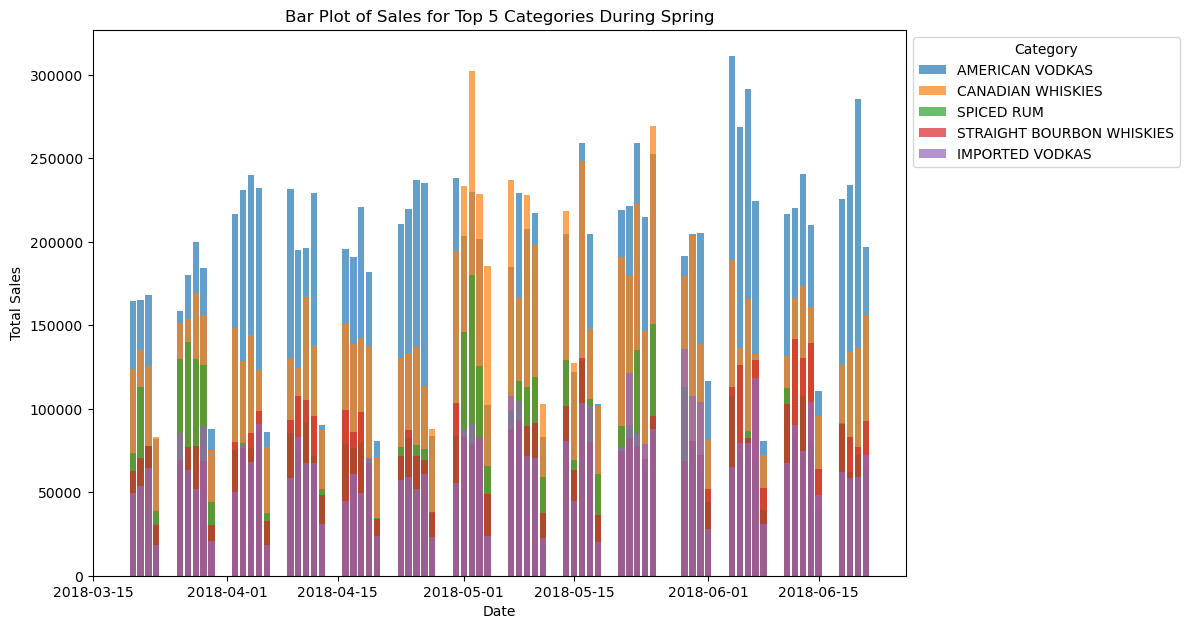

In [30]:
# spring started in Iowa on March 20th, 2018.

# Filter data for spring
spring_start = pd.Timestamp('2018-03-20')
spring_end = pd.Timestamp('2018-06-21')
spring_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= spring_start) & (liquor_sales_data['date'] <= spring_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = spring_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()

# Filter data for top 5 categories
top_5_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(top_5_categories)]

# Plot line plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Top 5 Categories During Spring')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [31]:
# Filter data for spring
spring_start = pd.Timestamp('2018-03-20')
spring_end = pd.Timestamp('2018-06-21')
spring_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= spring_start) & (liquor_sales_data['date'] <= spring_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = spring_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()

# Filter data for top 5 categories
top_5_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(top_5_categories)]

# Find peak date for each category
peak_dates = []
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    peak_date = category_data.loc[category_data['sale_dollars'].idxmax()]['date'].date()
    peak_dates.append((category, peak_date))

print("Peak dates for top 5 categories in spring:")
for category, peak_date in peak_dates:
    print(f"Category: {category}, Peak Date: {peak_date}")




Peak dates for top 5 categories in spring:
Category: AMERICAN VODKAS, Peak Date: 2018-06-04
Category: CANADIAN WHISKIES, Peak Date: 2018-05-02
Category: SPICED RUM, Peak Date: 2018-05-02
Category: STRAIGHT BOURBON WHISKIES, Peak Date: 2018-06-12
Category: IMPORTED VODKAS, Peak Date: 2018-05-29


## 3.2 Spring wrost 10 sale

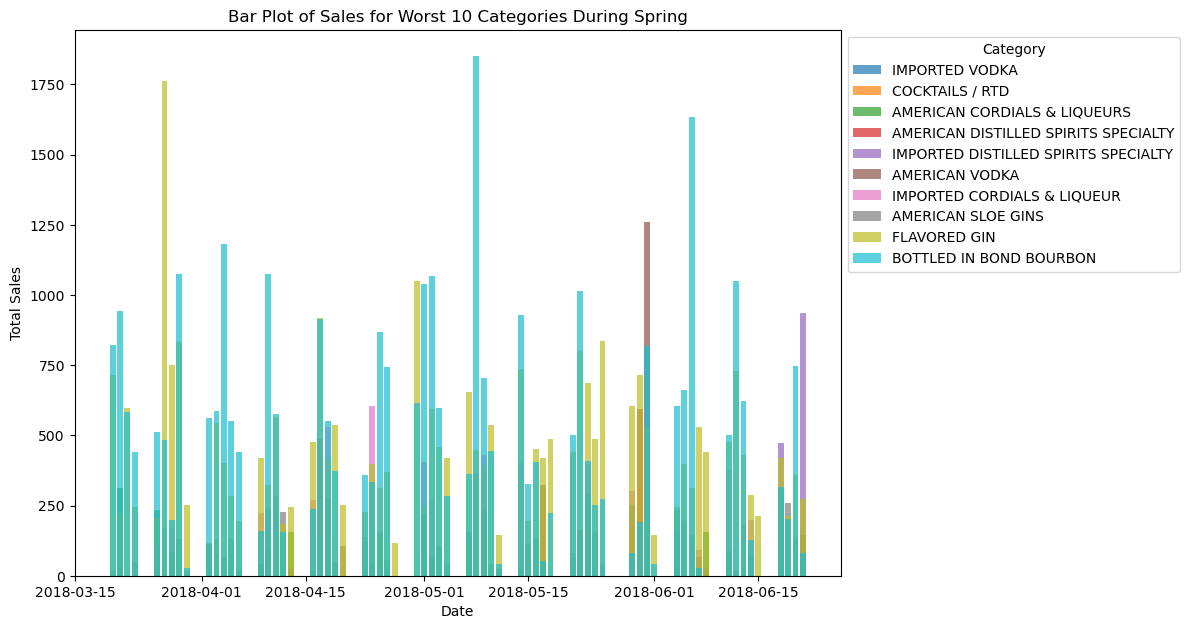

In [32]:
# Filter data for spring
spring_start = pd.Timestamp('2018-03-20')
spring_end = pd.Timestamp('2018-06-21')
spring_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= spring_start) & (liquor_sales_data['date'] <= spring_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = spring_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get the worst 10 categories
worst_10_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nsmallest(10).index.tolist()

# Filter data for the worst 10 categories
worst_10_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(worst_10_categories)]

# Plot bar plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in worst_10_categories:
    category_data = worst_10_sales_by_date[worst_10_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Worst 10 Categories During Spring')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()






## 3.3 Summer top 5 sales 

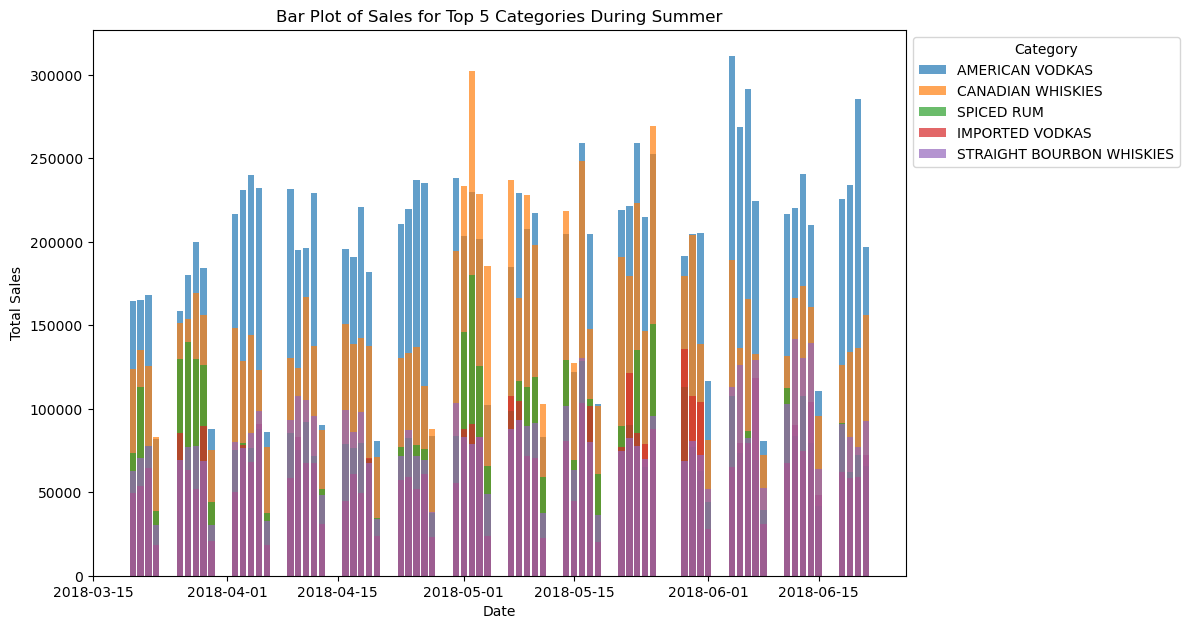

In [33]:
# summer started in Iowa on March 20th, 2018.

# Filter data for summer
summer_start = pd.Timestamp('2018-06-21')
summer_end = pd.Timestamp('2018-09-22')
summer_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= summer_start) & (liquor_sales_data['date'] <= summer_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = summer_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()


# Plot line plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Top 5 Categories During Summer')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


In [34]:
# Filter data for summer
summer_start = pd.Timestamp('2018-06-21')
summer_end = pd.Timestamp('2018-09-22')
summer_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= summer_start) & (liquor_sales_data['date'] <= summer_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = summer_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()

# Filter data for top 5 categories
top_5_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(top_5_categories)]

# Find peak date for each category
peak_dates = []
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    peak_date = category_data.loc[category_data['sale_dollars'].idxmax()]['date'].date()
    peak_dates.append((category, peak_date))

print("Peak dates for top 5 categories in summer:")
for category, peak_date in peak_dates:
    print(f"Category: {category}, Peak Date: {peak_date}")

Peak dates for top 5 categories in summer:
Category: AMERICAN VODKAS, Peak Date: 2018-06-26
Category: CANADIAN WHISKIES, Peak Date: 2018-09-06
Category: SPICED RUM, Peak Date: 2018-08-06
Category: IMPORTED VODKAS, Peak Date: 2018-09-11
Category: STRAIGHT BOURBON WHISKIES, Peak Date: 2018-08-15


## 3.4 Summer wrost 10 sales 

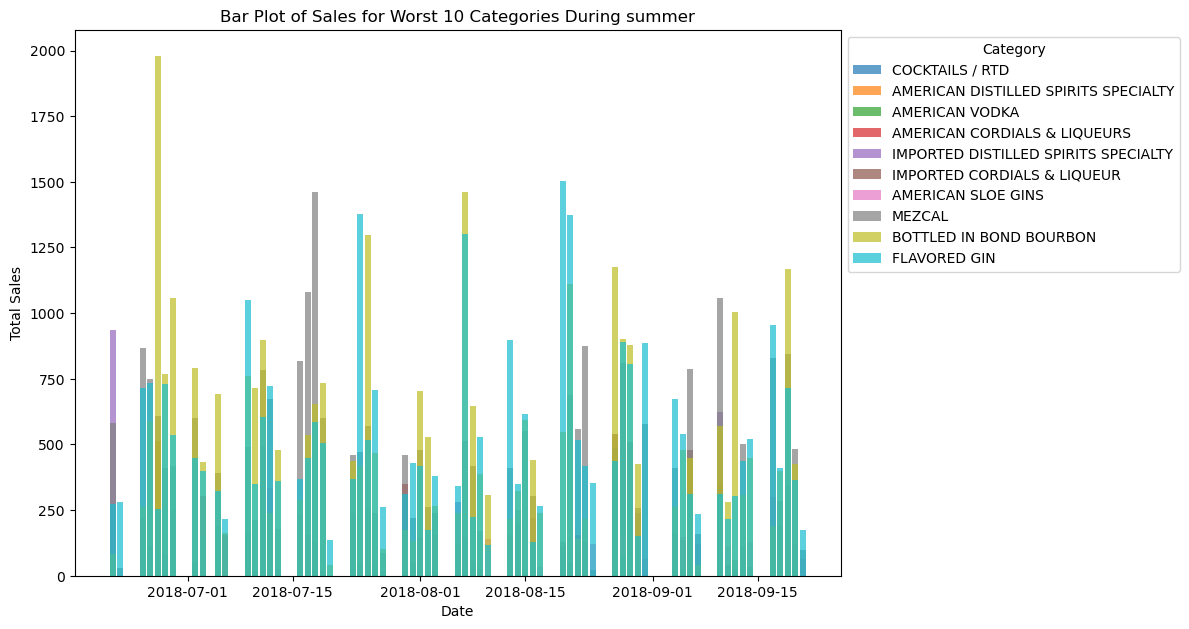

In [36]:
# Filter data for summer
summer_start = pd.Timestamp('2018-06-21')
summer_end = pd.Timestamp('2018-09-22')
summer_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= summer_start) & (liquor_sales_data['date'] <= summer_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = summer_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get the worst 10 categories
worst_10_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nsmallest(10).index.tolist()

# Filter data for the worst 10 categories
worst_10_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(worst_10_categories)]

# Plot bar plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in worst_10_categories:
    category_data = worst_10_sales_by_date[worst_10_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Worst 10 Categories During summer')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

## 3.5 Winter top 5 sales 

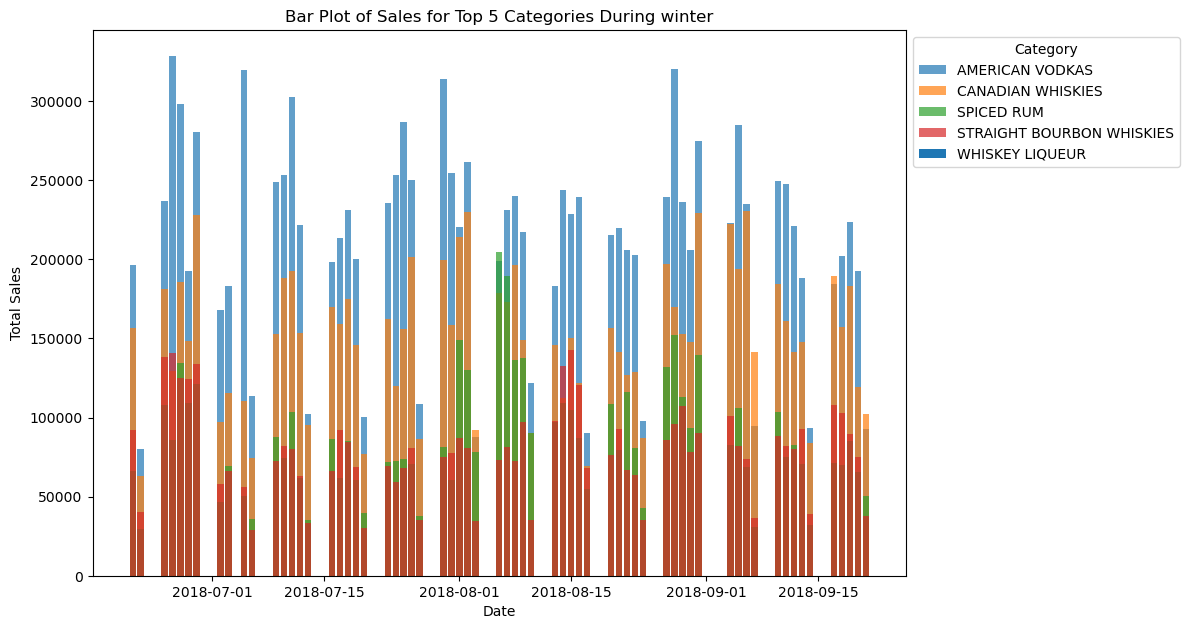

In [37]:
# winter started in Iowa on December 21st, 2018.

# Filter data for winter
winter_start = pd.Timestamp('2018-12-21')
winter_end = pd.Timestamp('2019-03-20')
winter_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= winter_start) & (liquor_sales_data['date'] <= winter_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = winter_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()


# Plot line plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Top 5 Categories During winter')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [38]:
# Filter data for winter
winter_start = pd.Timestamp('2018-12-21')
winter_end = pd.Timestamp('2019-03-20')
winter_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= winter_start) & (liquor_sales_data['date'] <= winter_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = winter_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()

# Filter data for top 5 categories
top_5_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(top_5_categories)]

# Find peak date for each category
peak_dates = []
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    peak_date = category_data.loc[category_data['sale_dollars'].idxmax()]['date'].date()
    peak_dates.append((category, peak_date))

print("Peak dates for top 5 categories in winter:")
for category, peak_date in peak_dates:
    print(f"Category: {category}, Peak Date: {peak_date}")





Peak dates for top 5 categories in winter:
Category: AMERICAN VODKAS, Peak Date: 2018-12-21
Category: CANADIAN WHISKIES, Peak Date: 2018-12-21
Category: SPICED RUM, Peak Date: 2019-03-06
Category: STRAIGHT BOURBON WHISKIES, Peak Date: 2018-12-26
Category: WHISKEY LIQUEUR, Peak Date: 2018-12-21


## 3.6 Winter wrost 10 sales

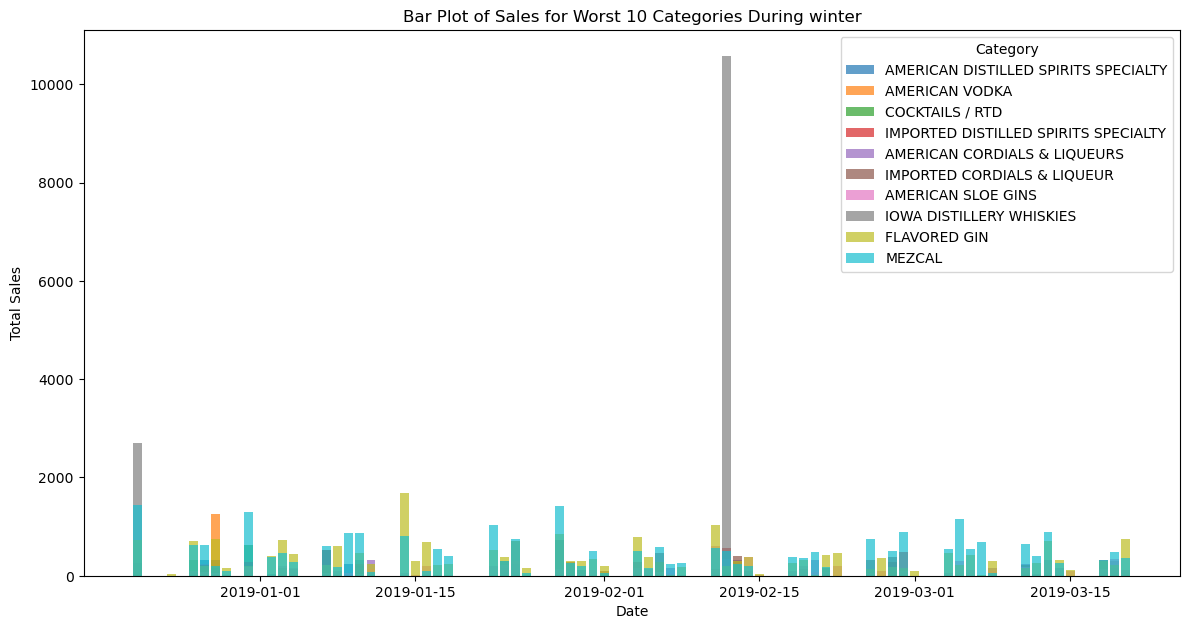

In [39]:
# Filter data for winter
winter_start = pd.Timestamp('2018-12-21')
winter_end = pd.Timestamp('2019-03-20')
winter_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= winter_start) & (liquor_sales_data['date'] <= winter_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = winter_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get the worst 10 categories
worst_10_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nsmallest(10).index.tolist()

# Filter data for the worst 10 categories
worst_10_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(worst_10_categories)]

# Plot bar plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in worst_10_categories:
    category_data = worst_10_sales_by_date[worst_10_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Worst 10 Categories During winter')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

## 3.7 Autumn top 5 sales

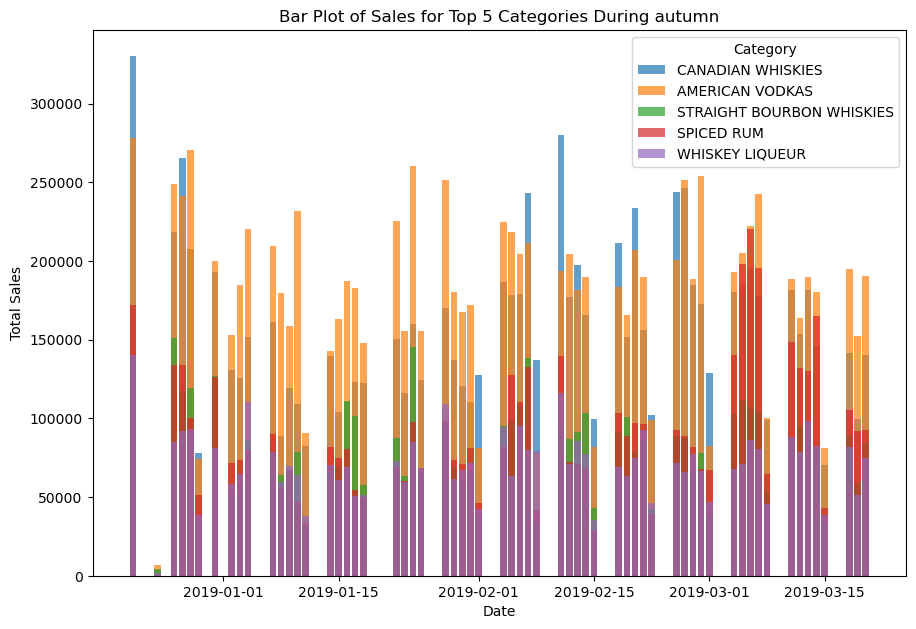

In [40]:
# autumn started in Iowa on September 22nd, 2018.

# Filter data for autumn
autumn_start = pd.Timestamp('2018-09-22')
autumn_end = pd.Timestamp('2018-12-21')
autumn_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= autumn_start) & (liquor_sales_data['date'] <= autumn_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = autumn_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()


# Plot line plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Top 5 Categories During autumn')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [41]:
# Filter data for autumn
autumn_start = pd.Timestamp('2018-09-22')
autumn_end = pd.Timestamp('2018-12-21')
autumn_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= autumn_start) & (liquor_sales_data['date'] <= autumn_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = autumn_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get top 5 categories
top_5_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nlargest(5).index.tolist()

# Filter data for top 5 categories
top_5_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(top_5_categories)]

# Find peak date for each category
peak_dates = []
for category in top_5_categories:
    category_data = top_5_sales_by_date[top_5_sales_by_date['category_name'] == category]
    peak_date = category_data.loc[category_data['sale_dollars'].idxmax()]['date'].date()
    peak_dates.append((category, peak_date))

print("Peak dates for top 5 categories in autumn:")
for category, peak_date in peak_dates:
    print(f"Category: {category}, Peak Date: {peak_date}")

Peak dates for top 5 categories in autumn:
Category: CANADIAN WHISKIES, Peak Date: 2018-10-02
Category: AMERICAN VODKAS, Peak Date: 2018-11-14
Category: STRAIGHT BOURBON WHISKIES, Peak Date: 2018-10-09
Category: SPICED RUM, Peak Date: 2018-12-21
Category: WHISKEY LIQUEUR, Peak Date: 2018-12-21


## 3.8 Autumn wrost 10 sales

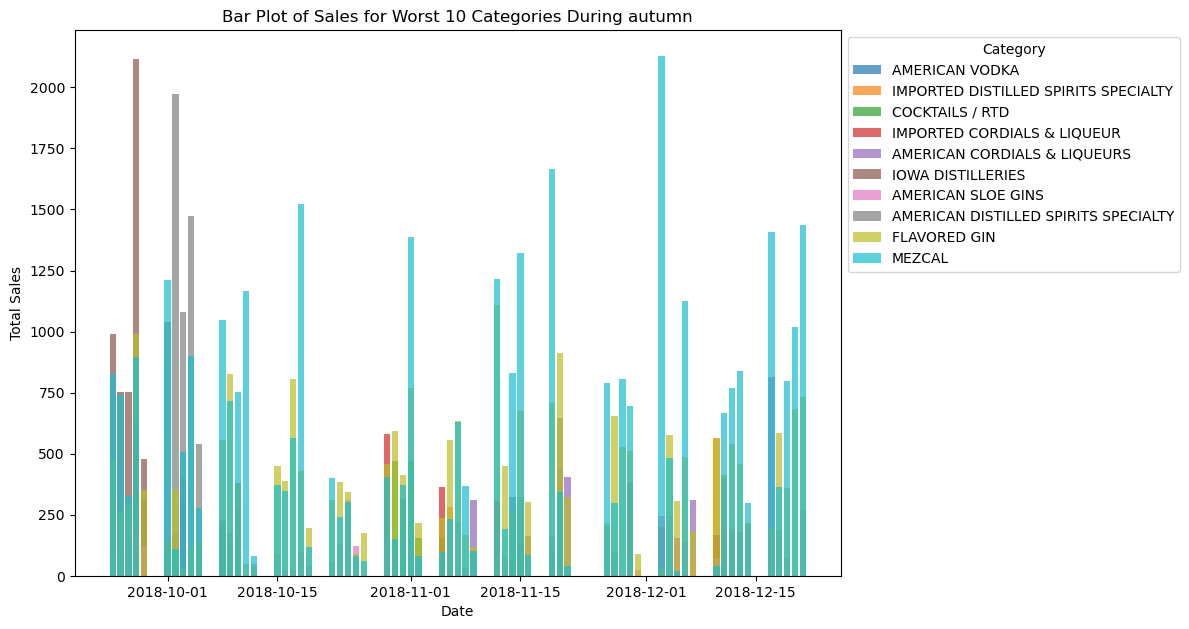

In [42]:
# Filter data for autumn
autumn_start = pd.Timestamp('2018-09-22')
autumn_end = pd.Timestamp('2018-12-21')
autumn_sales_data = liquor_sales_data[(liquor_sales_data['date'] >= autumn_start) & (liquor_sales_data['date'] <= autumn_end)]

# Group by date and category_name and sum sale_dollars
category_sales_by_date = autumn_sales_data.groupby(['date', 'category_name'])['sale_dollars'].sum().reset_index()

# Get the worst 10 categories
worst_10_categories = category_sales_by_date.groupby('category_name')['sale_dollars'].sum().nsmallest(10).index.tolist()

# Filter data for the worst 10 categories
worst_10_sales_by_date = category_sales_by_date[category_sales_by_date['category_name'].isin(worst_10_categories)]

# Plot bar plot for each category
plt.figure(figsize=(12, 12))

# Create a bar plot for each category
plt.subplot(2, 1, 1)
for category in worst_10_categories:
    category_data = worst_10_sales_by_date[worst_10_sales_by_date['category_name'] == category]
    plt.bar(category_data['date'], category_data['sale_dollars'], label=category, alpha=0.7)
plt.title('Bar Plot of Sales for Worst 10 Categories During autumn')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


# #4 Understanding the coorelations between Temperature increase or decrease vs Category Product

Prior to realize that analysis we will merge one external dataset with the general temperature of IOWA


In [43]:
# merge of the external dataset with temperatura of IOWA

In [44]:
# Reading the CSV file
iowa_temp_data = pd.read_csv('nwscoop.csv')

# Rename the column
iowa_temp_data.rename(columns={'day': 'date'}, inplace=True)

# selecting the data only for the required period
iowa_temp_data = iowa_temp_data[(iowa_temp_data['date'] >= '2018-03-20') & (iowa_temp_data['date'] <= '2019-03-20')]

In [45]:
# creating a new dataset for the analyzis

liquor_sales_subdata = liquor_sales_data[(liquor_sales_data['date'] >= '2018-03-20') & (liquor_sales_data['date'] <= '2019-03-20')]
liquor_sales_subdata = liquor_sales_subdata.sort_values(by='date')

# Display the subset DataFrame
liquor_sales_subdata.head(10)

,date,category_name,bottle_volume_ml,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1094757,2018-03-20,WHISKEY LIQUEUR,375,6,48.00,2.25,0.59
6017136,2018-03-20,AMERICAN FLAVORED VODKA,750,12,80.64,9.00,2.38
6017728,2018-03-20,AMERICAN VODKAS,750,12,65.52,9.00,2.38
6017867,2018-03-20,CANADIAN WHISKIES,750,12,280.68,9.00,2.38
6017967,2018-03-20,AMERICAN VODKAS,750,12,180.00,9.00,2.38
6017997,2018-03-20,AMERICAN VODKAS,750,12,148.56,9.00,2.38
650781,2018-03-20,BLENDED WHISKIES,200,12,35.88,2.40,0.63
6018108,2018-03-20,AMERICAN BRANDIES,750,12,98.64,9.00,2.38
6018293,2018-03-20,IMPORTED VODKAS,750,12,148.56,9.00,2.38
6018327,2018-03-20,IMPORTED BRANDIES,375,24,408.96,9.00,2.38


In [46]:
# Convert 'date' column to datetime format
iowa_temp_data['date'] = pd.to_datetime(iowa_temp_data['date'])

In [47]:
# Merge the two DataFrames
liquorsales_temp_subdata = pd.merge(liquor_sales_subdata, iowa_temp_data, on='date', how='inner')

# Display the merged DataFrame
liquorsales_temp_subdata.tail(50)


,date,category_name,bottle_volume_ml,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,high,highc,low,lowc
2367646,2019-03-20,SCOTCH WHISKIES,1750,6,94.50,10.50,2.77,49,9.4,29,-1.7
2367647,2019-03-20,IMPORTED FLAVORED VODKA,750,1,24.74,0.75,0.19,49,9.4,29,-1.7
2367648,2019-03-20,COCKTAILS /RTD,1750,6,90.36,10.50,2.77,49,9.4,29,-1.7
2367649,2019-03-20,WHISKEY LIQUEUR,100,48,64.80,4.80,1.26,49,9.4,29,-1.7
2367650,2019-03-20,AMERICAN VODKAS,375,6,31.50,2.25,0.59,49,9.4,29,-1.7
2367651,2019-03-20,AMERICAN VODKAS,1000,12,132.00,12.00,3.17,49,9.4,29,-1.7
2367652,2019-03-20,AMERICAN VODKAS,750,1,16.50,0.75,0.19,49,9.4,29,-1.7
2367653,2019-03-20,WHITE RUM,1750,1,22.50,1.75,0.46,49,9.4,29,-1.7
2367654,2019-03-20,AMERICAN SCHNAPPS,750,2,12.00,1.50,0.39,49,9.4,29,-1.7
2367655,2019-03-20,AMERICAN VODKAS,200,1,2.63,0.20,0.05,49,9.4,29,-1.7


After the merge of both dataset lets see the temperature history during the selected seasonal period

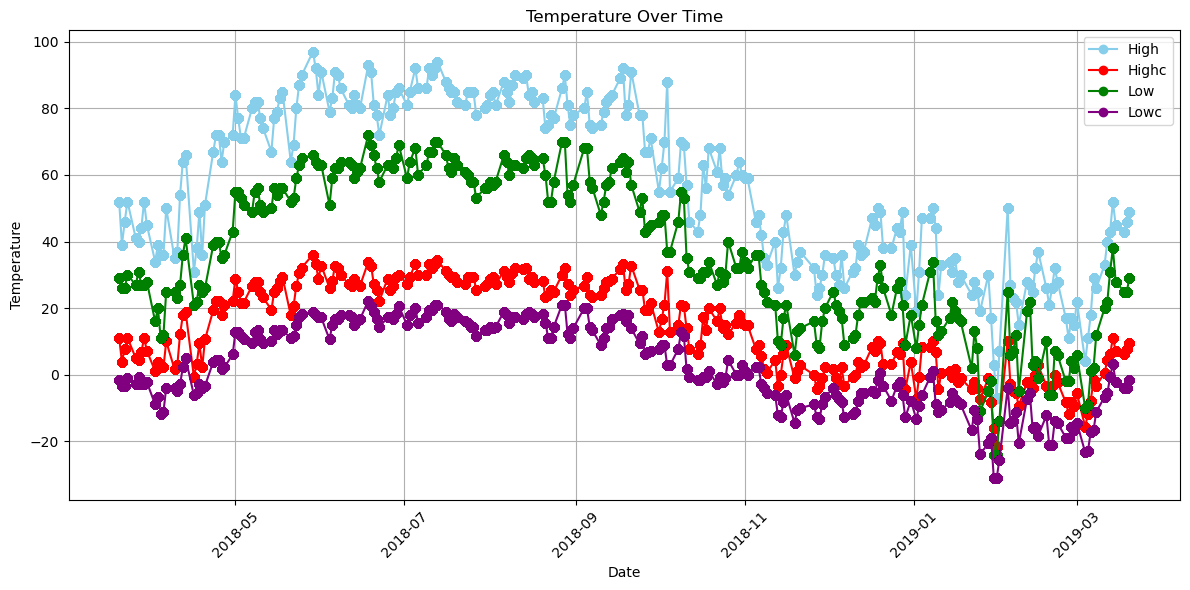

In [48]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot date against high
plt.plot(liquorsales_temp_subdata['date'], liquorsales_temp_subdata['high'], marker='o', color='skyblue', linestyle='-', label='High')

# Plot date against highc
plt.plot(liquorsales_temp_subdata['date'], liquorsales_temp_subdata['highc'], marker='o', color='red', linestyle='-', label='Highc')

# Plot date against low
plt.plot(liquorsales_temp_subdata['date'], liquorsales_temp_subdata['low'], marker='o', color='green', linestyle='-', label='Low')

# Plot date against lowc
plt.plot(liquorsales_temp_subdata['date'], liquorsales_temp_subdata['lowc'], marker='o', color='purple', linestyle='-', label='Lowc')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Below we will try to answer few questions related to this topic:

If the temperature increases 30 degrees, there is any product that also increases the volume sold?

In [49]:
# in this line of code we will try to pick the first date when the temperature increased 30 degrees and after that
# make some analysis with this date.
from datetime import timedelta

# Initialize variable to store the date
date1 = None

# Iterate over the DataFrame to find the date
for i in range(len(liquorsales_temp_subdata) - 1):
    current_date = liquorsales_temp_subdata.iloc[i]['date']
    next_date = liquorsales_temp_subdata.iloc[i + 1]['date']
    current_temp = liquorsales_temp_subdata.iloc[i]['high']
    next_temp = liquorsales_temp_subdata.iloc[i + 1]['high']

    # Check if the temperature has increased by 30 degrees within a 7-day period
    if next_date - current_date <= timedelta(days=7) and next_temp - current_temp >= 30:
        date1 = current_date
        break

# Display the result
print(f"The date when the temperature increased by 30 degrees within a 7-day period is: {date1}")

The date when the temperature increased by 30 degrees within a 7-day period is: 2019-02-01 00:00:00


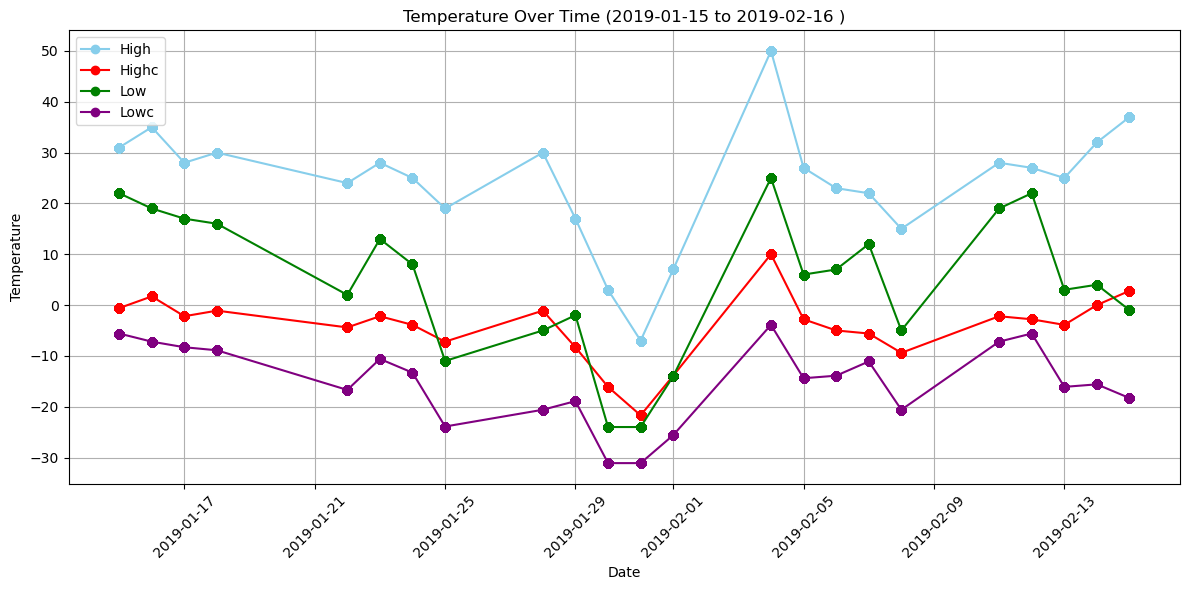

In [62]:
# first date with the peak of 30 degrees is 2019-02-01
# lets create a wide period and see if the above calculation is true by graph representation

# Filter the data for the specified date range
filtered_data = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot date against high
plt.plot(filtered_data['date'], filtered_data['high'], marker='o', color='skyblue', linestyle='-', label='High')

# Plot date against highc
plt.plot(filtered_data['date'], filtered_data['highc'], marker='o', color='red', linestyle='-', label='Highc')

# Plot date against low
plt.plot(filtered_data['date'], filtered_data['low'], marker='o', color='green', linestyle='-', label='Low')

# Plot date against lowc
plt.plot(filtered_data['date'], filtered_data['lowc'], marker='o', color='purple', linestyle='-', label='Lowc')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time (2019-01-15 to 2019-02-16 )')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


After get the peak date of 30 degrees increase lets make some coorelation analysis to see if there is any influence of the increase of the temperature with the volume sold :

The correlation between Temperature and 'volume_sold_liters' for the specified category AMERICAN VODKAS  and date range is: 0.015292977584401924


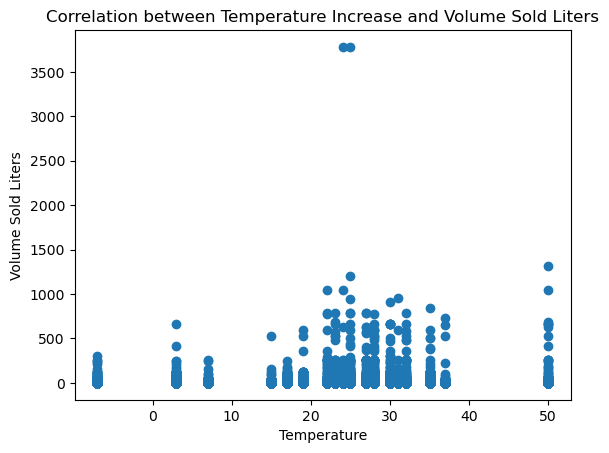

In [66]:
# Filter the data for the specified date range and category
filtered_data_1 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]
filtered_data_1_1 = filtered_data_1[filtered_data_1['category_name'] == 'AMERICAN VODKAS']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_1 = filtered_data_1_1['high'].corr(filtered_data_1_1['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category AMERICAN VODKAS  and date range is: {correlation_1}")

# Filter the data for the specified date range and category
filtered_data_1 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]
filtered_data_1_1 = filtered_data_1[filtered_data_1['category_name'] == 'AMERICAN VODKAS']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_1 = filtered_data_1_1['high'].corr(filtered_data_1_1['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_1_1['high'], filtered_data_1_1['volume_sold_liters'])
plt.xlabel('Temperature')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature Increase and Volume Sold Liters for AMERICAN VODKAS')
plt.show()


The correlation between Temperature and 'volume_sold_liters' for the specified category CANADIAN WHISKIES  and date range is: 0.004704160514989316


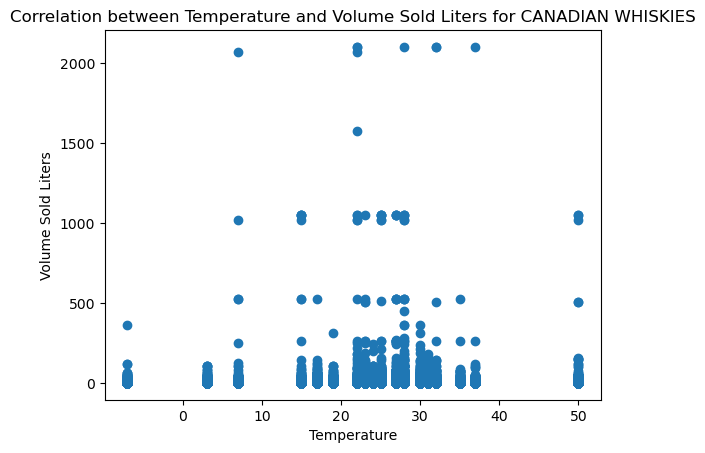

In [67]:
# Filter the data for the specified date range and category
filtered_data_2 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]
filtered_data_2_2 = filtered_data_2[filtered_data_2['category_name'] == 'CANADIAN WHISKIES']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_2 = filtered_data_2_2['high'].corr(filtered_data_2_2['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category CANADIAN WHISKIES  and date range is: {correlation_2}")

# Filter the data for the specified date range and category
filtered_data_2 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]
filtered_data_2_2 = filtered_data_2[filtered_data_2['category_name'] == 'CANADIAN WHISKIES']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_2 = filtered_data_2_2['high'].corr(filtered_data_2_2['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_2_2['high'], filtered_data_2_2['volume_sold_liters'])
plt.xlabel('Temperature')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature and Volume Sold Liters for CANADIAN WHISKIES')
plt.show()


The correlation between Temperature and 'volume_sold_liters' for the specified category SPICED RUM  and date range is: -0.008011175036285885


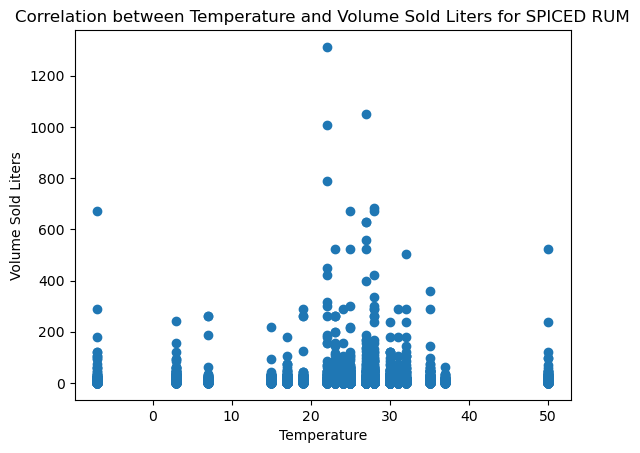

In [68]:
# Filter the data for the specified date range and category
filtered_data_3 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]
filtered_data_3_3 = filtered_data_3[filtered_data_3['category_name'] == 'SPICED RUM']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_3 = filtered_data_3_3['high'].corr(filtered_data_3_3['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category SPICED RUM  and date range is: {correlation_3}")

# Filter the data for the specified date range and category
filtered_data_3 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2019-01-15') & (liquorsales_temp_subdata['date'] <= '2019-02-16')]
filtered_data_3_3 = filtered_data_3[filtered_data_3['category_name'] == 'SPICED RUM']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_3 = filtered_data_3_3['high'].corr(filtered_data_3_3['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_3_3['high'], filtered_data_3_3['volume_sold_liters'])
plt.xlabel('Temperature')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature and Volume Sold Liters for SPICED RUM')
plt.show()


The correlation between Temperature and 'volume_sold_liters' for the specified category STRAIGHT BOURBON WHISKIES  and date range is: 0.0247791734161433


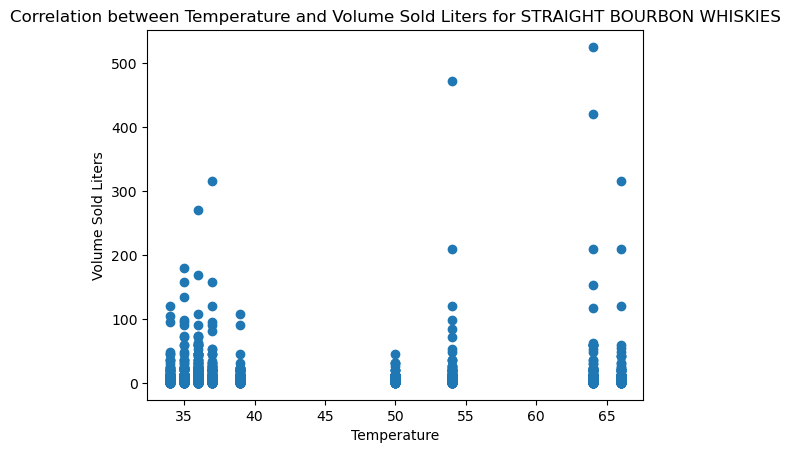

In [69]:
# Filter the data for the specified date range and category
filtered_data_4 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-01') & (liquorsales_temp_subdata['date'] <= '2018-04-15')]
filtered_data_4_4 = filtered_data_4[filtered_data_4['category_name'] == 'STRAIGHT BOURBON WHISKIES']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_4 = filtered_data_4_4['high'].corr(filtered_data_4_4['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category STRAIGHT BOURBON WHISKIES  and date range is: {correlation_4}")

# Filter the data for the specified date range and category
filtered_data_4 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-01') & (liquorsales_temp_subdata['date'] <= '2018-04-15')]
filtered_data_4_4 = filtered_data_4[filtered_data_4['category_name'] == 'STRAIGHT BOURBON WHISKIES']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_4 = filtered_data_4_4['high'].corr(filtered_data_4_4['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_4_4['high'], filtered_data_4_4['volume_sold_liters'])
plt.xlabel('Temperature')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature and Volume Sold Liters for STRAIGHT BOURBON WHISKIES')
plt.show()


If the temperature dencreases 20 degrees, there is any product that also increases the volume sold?

In [70]:
# first lets pick the first date when the temperature dropped 20 degrees within 7 days

# Initialize variable to store the date
date1 = None

# Iterate over the DataFrame to find the date
for i in range(len(liquorsales_temp_subdata) - 1):
    current_date = liquorsales_temp_subdata.iloc[i]['date']
    next_date = liquorsales_temp_subdata.iloc[i + 1]['date']
    current_temp = liquorsales_temp_subdata.iloc[i]['low']
    next_temp = liquorsales_temp_subdata.iloc[i + 1]['low']

    # Check if the temperature has decreased by 20 degrees within a 7-day period
    if next_date - current_date <= timedelta(days=7) and current_temp - next_temp >= 20:
        date1 = current_date
        break

# Display the result
print(f"The date when the low temperature dropped by 20 degrees within a 7-day period is: {date1}")

The date when the low temperature dropped by 20 degrees within a 7-day period is: 2018-04-13 00:00:00


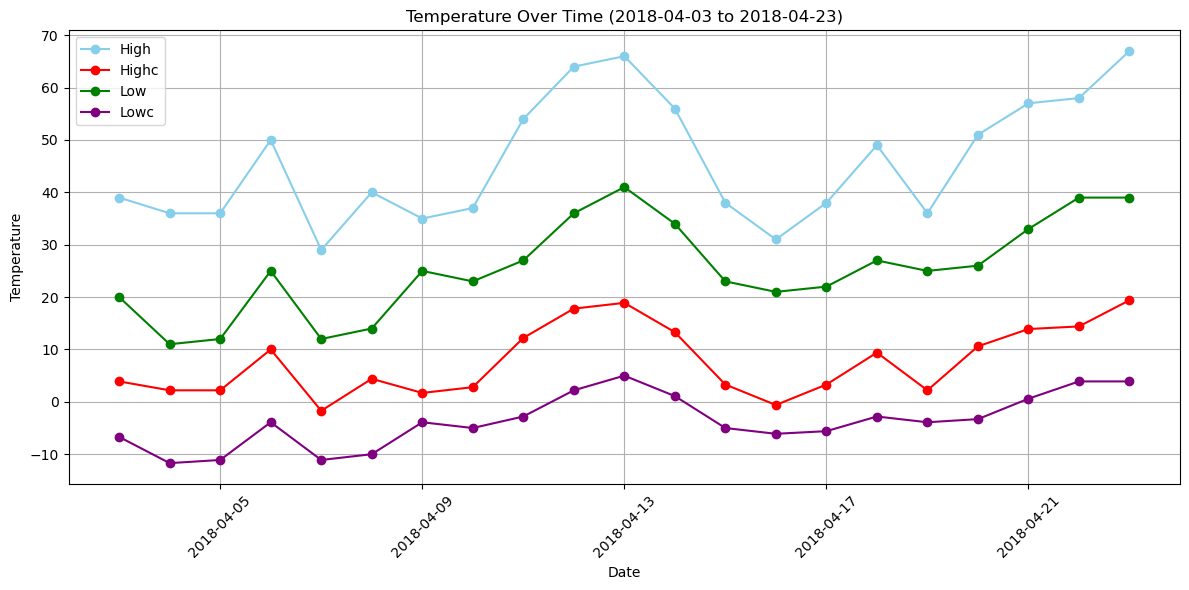

In [71]:
# first date with the drop of 20 degrees is 2018-04-13
# lets create a wide period and see if the above calculation is true by graph representation

# Filter the data for the specified date range
filtered_data = iowa_temp_data[(iowa_temp_data['date'] >= '2018-04-03') & (iowa_temp_data['date'] <= '2018-04-23')]

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot date against high
plt.plot(filtered_data['date'], filtered_data['high'], marker='o', color='skyblue', linestyle='-', label='High')

# Plot date against highc
plt.plot(filtered_data['date'], filtered_data['highc'], marker='o', color='red', linestyle='-', label='Highc')

# Plot date against low
plt.plot(filtered_data['date'], filtered_data['low'], marker='o', color='green', linestyle='-', label='Low')

# Plot date against lowc
plt.plot(filtered_data['date'], filtered_data['lowc'], marker='o', color='purple', linestyle='-', label='Lowc')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time (2018-04-03 to 2018-04-23)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

After get the date of 20 degrees dencrease lets make some coorelation analysis to see if there is any influence of the decrease of the temperature with the volume sold :

The correlation between Temperature and 'volume_sold_liters' for the specified category AMERICAN VODKAS  and date range is: 0.00254117793103399


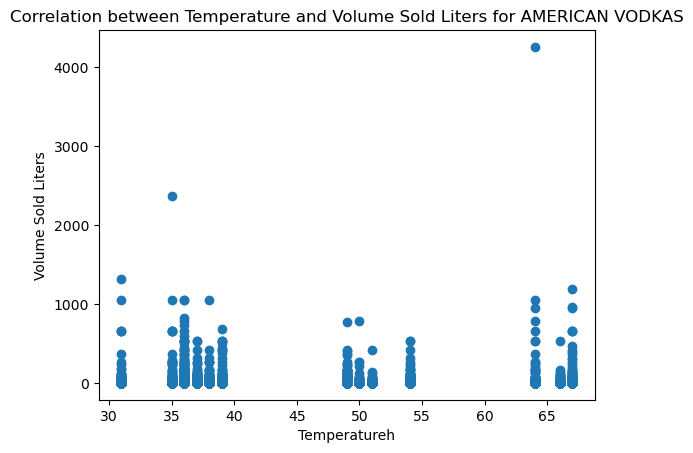

In [74]:
# Filter the data for the specified date range and category
filtered_data_7 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-03') & (liquorsales_temp_subdata['date'] <= '2018-04-23')]
filtered_data_7_7 = filtered_data_7[filtered_data_7['category_name'] == 'AMERICAN VODKAS']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_7 = filtered_data_7_7['high'].corr(filtered_data_7_7['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category AMERICAN VODKAS  and date range is: {correlation_7}")

# Filter the data for the specified date range and category
filtered_data_7 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-03') & (liquorsales_temp_subdata['date'] <= '2018-04-23')]
filtered_data_7_7 = filtered_data_7[filtered_data_7['category_name'] == 'AMERICAN VODKAS']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_7 = filtered_data_7_7['high'].corr(filtered_data_7_7['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_7_7['high'], filtered_data_7_7['volume_sold_liters'])
plt.xlabel('Temperatureh')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature and Volume Sold Liters for AMERICAN VODKAS')
plt.show()

The correlation between Temperature and 'volume_sold_liters' for the specified category CANADIAN WHISKIES  and date range is: -0.0010932109358018942


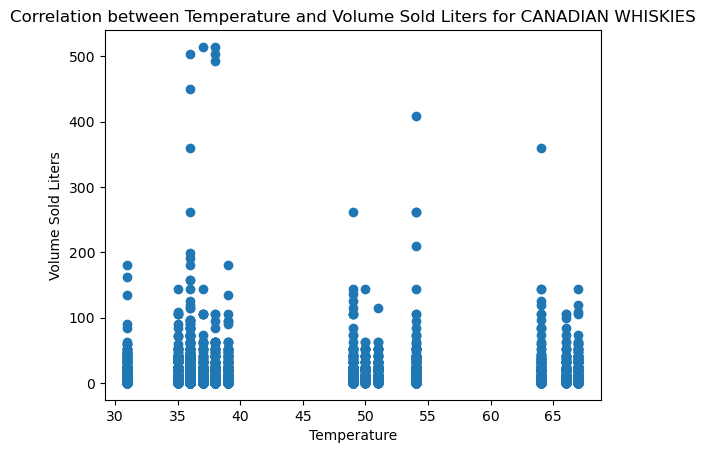

In [75]:
# Filter the data for the specified date range and category
filtered_data_8 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-03') & (liquorsales_temp_subdata['date'] <= '2018-04-23')]
filtered_data_8_8 = filtered_data_8[filtered_data_8['category_name'] == 'CANADIAN WHISKIES']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_8 = filtered_data_8_8['high'].corr(filtered_data_8_8['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category CANADIAN WHISKIES  and date range is: {correlation_8}")

# Filter the data for the specified date range and category
filtered_data_8 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-03') & (liquorsales_temp_subdata['date'] <= '2018-04-23')]
filtered_data_8_8 = filtered_data_8[filtered_data_8['category_name'] == 'CANADIAN WHISKIES']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_8 = filtered_data_8_8['high'].corr(filtered_data_8_8['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_8_8['high'], filtered_data_8_8['volume_sold_liters'])
plt.xlabel('Temperature')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature and Volume Sold Liters for CANADIAN WHISKIES')
plt.show()

The correlation between 'high' and 'volume_sold_liters' for the specified category SPICED RUM  and date range is: -0.011127855699557366


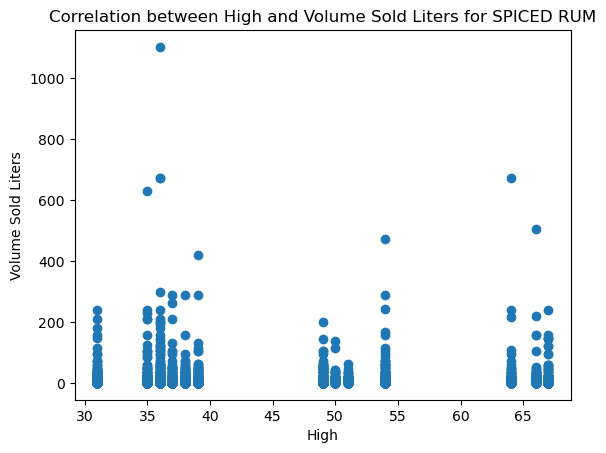

In [59]:
# Filter the data for the specified date range and category
filtered_data_9 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-03') & (liquorsales_temp_subdata['date'] <= '2018-04-23')]
filtered_data_9_9 = filtered_data_9[filtered_data_9['category_name'] == 'SPICED RUM']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_9 = filtered_data_9_9['high'].corr(filtered_data_9_9['volume_sold_liters'])

# Display the correlation
print(f"The correlation between Temperature and 'volume_sold_liters' for the specified category SPICED RUM  and date range is: {correlation_9}")

# Filter the data for the specified date range and category
filtered_data_9 = liquorsales_temp_subdata[(liquorsales_temp_subdata['date'] >= '2018-04-03') & (liquorsales_temp_subdata['date'] <= '2018-04-23')]
filtered_data_9_9 = filtered_data_9[filtered_data_9['category_name'] == 'SPICED RUM']

# Calculate the correlation between 'high' and 'volume_sold_liters'
correlation_9 = filtered_data_9_9['high'].corr(filtered_data_9_9['volume_sold_liters'])

# Plot 'high' against 'volume_sold_liters'
plt.scatter(filtered_data_9_9['high'], filtered_data_9_9['volume_sold_liters'])
plt.xlabel('Temperature')
plt.ylabel('Volume Sold Liters')
plt.title('Correlation between Temperature and Volume Sold Liters for SPICED RUM')
plt.show()

# 5 IOWA Holidays analysis

Knowing some holidays in IOWA lets see what are the most sold products in that dates:

In [72]:
# getting the most sold products for the holiday dates in 2018

import datetime

# List of specific dates
specific_dates = [
    '01-01',
    '01-15',
    '05-27',
    '07-04',
    '09-02',
    '11-11',
    '11-28',
    '11-29',
    '12-25'
]

# Iterate over specific dates
for date_str in specific_dates:
    date = datetime.datetime.strptime(f"2018-{date_str}", "%Y-%m-%d")
    date_data = liquorsales_temp_subdata[liquorsales_temp_subdata['date'] == date]
    
    if not date_data.empty:
        max_volume_row = date_data.loc[date_data['volume_sold_liters'].idxmax()]
        category_name = max_volume_row['category_name']
        volume_sold_liters = max_volume_row['volume_sold_liters']
        print(f"On {date.strftime('%B %d')}, the category '{category_name}' had the biggest volume_sold_liters of {volume_sold_liters}")
    else:
        print(f"No data found for {date.strftime('%B %d')}")
        


No data found for January 01
No data found for January 15
No data found for May 27
No data found for July 04
No data found for September 02
No data found for November 11
On November 28, the category 'AMERICAN VODKAS' had the biggest volume_sold_liters of 1050.0
On November 29, the category 'CANADIAN WHISKIES' had the biggest volume_sold_liters of 1018.5
No data found for December 25


In [73]:
# getting the most sold products for the holiday dates in 2019

# Iterate over specific dates
for date_str in specific_dates:
    date = datetime.datetime.strptime(f"2019-{date_str}", "%Y-%m-%d")
    date_data = liquorsales_temp_subdata[liquorsales_temp_subdata['date'] == date]
    
    if not date_data.empty:
        max_volume_row = date_data.loc[date_data['volume_sold_liters'].idxmax()]
        category_name = max_volume_row['category_name']
        volume_sold_liters = max_volume_row['volume_sold_liters']
        print(f"On {date.strftime('%B %d')}, the category '{category_name}' had the biggest volume_sold_liters of {volume_sold_liters}")
    else:
        print(f"No data found for {date.strftime('%B %d')}")

No data found for January 01
On January 15, the category 'AMERICAN VODKAS' had the biggest volume_sold_liters of 960.0
No data found for May 27
No data found for July 04
No data found for September 02
No data found for November 11
No data found for November 28
No data found for November 29
No data found for December 25


After quick look into the Holidays top sells we can say :

On November 28, the category 'AMERICAN VODKAS' had the biggest volume_sold_liters of 1050.0

On November 29, the category 'CANADIAN WHISKIES' had the biggest volume_sold_liters of 1018.5

On January 15, the category 'AMERICAN VODKAS' had the biggest volume_sold_liters of 960.0

# 6 Conclusion and final Analysis recomendation:

It has been observed that American Vodkas and Canadian Whiskies are popular choices across all seasons, regardless of the temperature. However, there are some interesting variations:

During hot weather, such as summer and spring, Spiced Rum and Straight Bourbon Whiskies become the second choice for customers. Conversely, during cold temperatures, customer consumption shifts to Whiskey Liqueur.

During holidays, there is a significant increase in volume sold before and after the holidays, such as on November 28 and 29.

In conclusion, we strongly recommend stocking, checking the supply chain, and advertising the following products for each season:

    Spring: American Vodkas, Canadian Whiskies, Spiced Rum, Straight Bourbon Whiskies, and Imported Vodkas.

    Summer: American Vodkas, Canadian Whiskies, Spiced Rum, Imported Vodkas, and Straight Bourbon Whiskies.

    Winter: American Vodkas, Canadian Whiskies, Spiced Rum, Straight Bourbon Whiskies, and Whiskey Liqueur.

    Autumn: Canadian Whiskies, American Vodkas, Straight Bourbon Whiskies, Spiced Rum, and Whiskey Liqueur.
